# Midterm exam

Date: 23/10/2018

### YOUR NAME: Anuar Maratkhan

`Instructions:`

- The duration of this exam is 75 minutes.
-  Students are required to follow all instructions given by the examiners.
-  Talking is NOT allowed under any circumstances.
-  Students MAY NOT bring any written or printed materials into the examination room except where explicitly allowed by the examiner.
-  Mobile phones are strictly prohibited in the examination room.
-  Students MAY NOT bring any electronic device into the examination room except where explicitly allowed by the examiner (e.g., calculators with specified capabilities).
-  Students may raise their hand to ask the examiner a question. The examiner may decide not to answer the question: students are expected to know the requisite terminology and understand the examination questions.
-  For examinations lasting two hours or less, students are NOT allowed to leave the examination room until ready to turn in their work.
-  Write your answers in the (cell) space provided below the problem. If you make a mess, clearly indicate your final answer.

----
`Pledge`:

-  I have read and understood the examination rules. I will not cheat, copy from other students, or use unauthorized materials or devices, and I have not brought such materials or devices into the examination room.

Write your name again: Anuar Maratkhan

In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/macbookpro/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['norm', 'grid', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Topic: Cross Validation 

### 1. Load the Diabetes dataset

The diabetes dataset consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year.
 
Load the features in a variable with name $\mathbf{X}$ and the target in a variable with name $\mathbf{y}$.

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [ ]:
print(diabetes['DESCR'])

### 2. Evaluate a Linear Regression model using 10-fold cross-validation

Create a Linear Regression model and assign it to a variable with name **`lr`**.   
http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

Create a cross validation generator with 10 folds. Set the parameter **`shuffle`** to **`True`**, in order to shuffle the data before creating the folds. Set the parameter **`random_state`** to 0 to create always the same combination of folds.
Assign it to a variable with name **`cv`**.   
http://scikit-learn.org/stable/modules/cross_validation.html#k-fold

Use the function **`cross_val_score`** to evaluate the model using the cross validator. This function returns a list of scores.   
http://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics

Finally, print the mean and standard deviation of the scores.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score


lr = LinearRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=0)

scores = cross_val_score(lr, X, y, cv=cv)

print(np.mean(scores))
print(np.std(scores))

0.56488708669
0.0490593680954


### 3. Redo the same evaluation, this time using the Mean Squared Error as score function

Check which score function is used by the validator by default.

Create a new scorer function that calculates the Mean Squared Error. You can use the function **`mean_squared_error`** from sklearn:   
http://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules

Use again the function **`cross_val_score`** to evaluate the model using the cross validator and the new scorer.

Finally, print the mean and standard deviation of the new scores.

In [11]:
print(lr.score.__doc__)

Returns the coefficient of determination R^2 of the prediction.

        The coefficient R^2 is defined as (1 - u/v), where u is the residual
        sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
        sum of squares ((y_true - y_true.mean()) ** 2).sum().
        The best possible score is 1.0 and it can be negative (because the
        model can be arbitrarily worse). A constant model that always
        predicts the expected value of y, disregarding the input features,
        would get a R^2 score of 0.0.

        Parameters
        ----------
        X : array-like, shape = (n_samples, n_features)
            Test samples.

        y : array-like, shape = (n_samples) or (n_samples, n_outputs)
            True values for X.

        sample_weight : array-like, shape = [n_samples], optional
            Sample weights.

        Returns
        -------
        score : float
            R^2 of self.predict(X) wrt. y.
        


In [20]:
scores = cross_val_score(lr, X, y, cv=cv, scoring='neg_mean_squared_error')

print(np.mean(scores))
print(np.std(scores))

-2985.22827259
472.547130651


### 4. Evaluate a Logistic Regression model using 10-fold cross-validation

Create a Logistic Regression model with default parameters and assign it to a variable with name **`logistic`**.   
 
Create a cross validation generator with 10 folds. Set the parameter **`shuffle`** to **`True`**, in order to shuffle the data before creating the folds. Set the parameter **`random_state`** to 0 to create always the same combination of folds.
Assign it to a variable with name **`cv`**.   
http://scikit-learn.org/stable/modules/cross_validation.html#k-fold

Use the function **`cross_val_score`** to evaluate the model using the cross validator.
Use the scorer function that calculates the Mean Squared Error to calculate the scores.   
http://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics

Print the mean and standard deviation of the scores.

In [22]:
from sklearn.linear_model import LogisticRegression


logistic = LogisticRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=0)

scores = cross_val_score(logistic, X, y, cv=cv, scoring='neg_mean_squared_error')

print(np.mean(scores))
print(np.std(scores))

-7698.20353535
2471.74665521


### 5. Find the best regularization parameter for a Logistic Regression model using 10-fold cross-validation

Create a logistic regression model with default parameters and assign it to a variable with name **`logistic`**.   
http://scikit-learn.org/stable/modules/linear_model#logistic-regression

Create a list of values for the regularization parameter (C) starting from $10^{-4}$ to $10^{2}$, spaced evenly on a log scale.

For each value of alpha, set the model parameter **`C`** to this value, calculate the 10-fold cross-validation scores, and add the average score to a list with name **`scores`**.

In [83]:
logistic = LogisticRegression()
alphas = np.logspace(1e-4, 1e2)
scores = []

cv = KFold(n_splits=10, shuffle=True, random_state=0)

for c in alphas:
    logistic.C = c
    avg = np.mean(cross_val_score(logistic, X, y, cv=cv, scoring='neg_mean_squared_error'))
    scores.append(avg)

Plot the scores and print the best regularization parameter.

-0.085
Best alpha: 1.00023028502


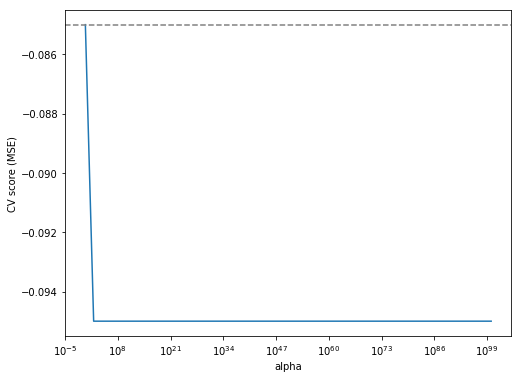

In [84]:
figure(figsize=(8, 6))

semilogx(alphas, scores)
ylabel('CV score (MSE)')
xlabel('alpha')

axhline(np.max(scores), linestyle='--', color='.5')

print (np.max(scores))
print ('Best alpha:', alphas[np.argmax(scores)])

------------------
## Topic: Support Vector Machines

### Generating data

In the following, 100 samples of a synthatic dataset is generated using the **sklearn.datasets.make_classification** function.

This dataset has 2 classes (**n_classes=2**) and 2 features (**n_features=2**). It means that $y \in \{0,1\}$ and $X \in \mathbb{R}^2$

The parameter **class_sep** controls the separability of the class, and in this example we set this to return a dataset that is linearly separable:

In [15]:
# create a colormap for the points
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

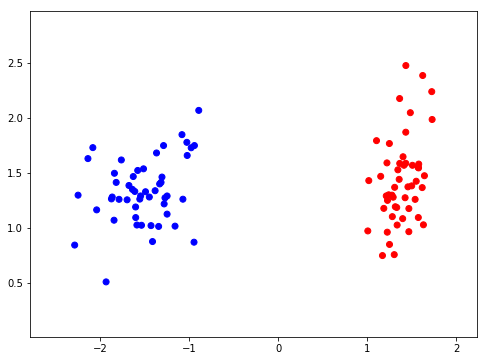

In [16]:
from sklearn import datasets

X, y = datasets.make_classification(n_samples=100, n_classes=2,
                                    n_features=2, n_redundant=0, n_informative=2,
                                    random_state=1, n_clusters_per_class=1, class_sep=1.4)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

figure(figsize=(8, 6))
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

# set the graph limits
ylim(y_min, y_max)
xlim(x_min, x_max);

This function will plot the decision boundary and the support vectors of a model:

In [17]:
def plot_boundary(model, X):
    # create a mesh of points that cover the full graph area
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    X_grid = np.c_[xx.ravel(), yy.ravel()]

    # use the classifier to predict the class of each mesh point
    Z = clf.decision_function(X_grid)
    Z = Z.reshape(xx.shape)

    figure(figsize=(8, 6))
    
    # plot the decision boundary
    norm = plt.cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
    contourf(xx, yy, Z, 12, cmap=plt.cm.RdBu, alpha=.8, norm=norm)
    # plt.colorbar()

    # plot the decision hyper-planes
    contour(xx, yy, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'],
            levels=[-1., 0, 1.])

    # plot the dataset points
    scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

    # plot the support vectors
    SV = clf.support_vectors_
    scatter(SV[:, 0], SV[:, 1], c=y[clf.support_],
            cmap=cm_bright, s=500, marker='x')

    # set the graph limits
    ylim(y_min, y_max)
    xlim(x_min, x_max);

#### Example 1: Linear kernel with high penalty ($C \rightarrow \infty$)

The parameter **C** controls the penalty of the error terms for a soft-margin SVM classifier.

Setting **C** to a high value means that the classifier will try to maximize the margin with a high penalty for misclassified points.

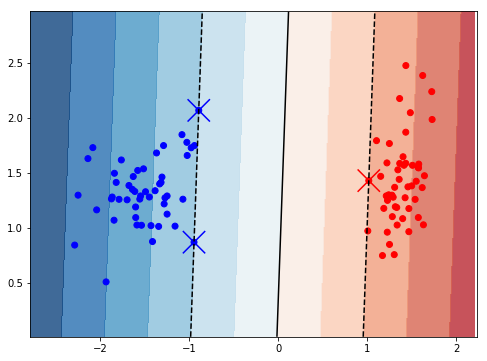

In [18]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1e12)
clf.fit(X, y)

plot_boundary(clf, X)

#### Example 2: Linear kernel with low penalty ($C \rightarrow 0$)

Setting **C** to a low value means that the classifier will try to maximize the margin with a small penalty for misclassified points.

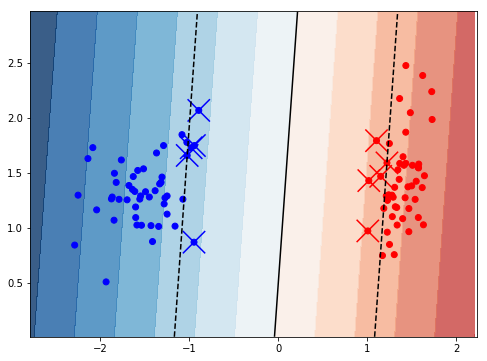

In [43]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1e-1)
clf.fit(X, y)

plot_boundary(clf, X)

#### Example 3: RBF kernel with high penalty ($C \rightarrow \infty$) and small $\gamma$:

The Radial Basis Function kernel is given by the function $\exp(-\gamma \left|x-x'\right|^2)$.

When training an SVM with the RBF kernel, two parameters must be considered: $C$ and $\gamma$. The parameter $C$, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low $C$ makes the decision surface smooth, while a high $C$ aims at classifying all training examples correctly. $\gamma$ defines how much influence a single training example has. The larger $\gamma$ is, the closer other examples must be to be affected.

Setting **C** to a high value means that the classifier will try to maximize the margin with a high penalty for misclassified points, and will try to classify all training examples correctly.

The parameter **gamma** is the coefficient of the RBF function. Setting **gamma** to a small value means that just a few training examples will have influence in the model.

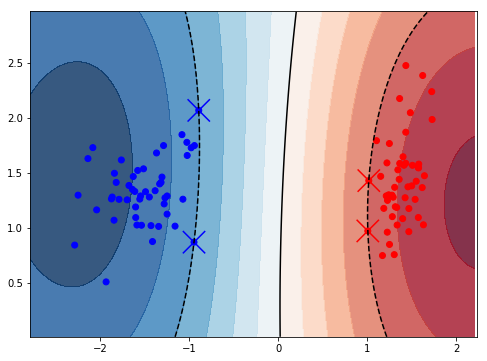

In [44]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', gamma=1e-1, C=1e12)
clf.fit(X, y)
plot_boundary(clf, X)

-------------
#### TASK 1: SET RBF kernel with high penalty ($C \rightarrow \infty$) and high $\gamma$ (e.g., $\gamma = 20$)

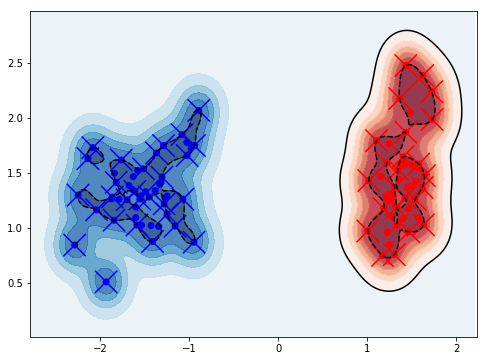

In [45]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', gamma=20, C=1e12)
clf.fit(X, y)
plot_boundary(clf, X)

#### TASK 2: Check the behavior of the SVM classifiers in the case when the dataset is not linearly separable.

First, create a new dataset that is not linearly separable:

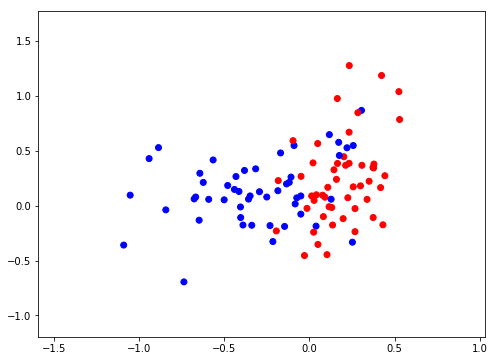

In [46]:
from sklearn import datasets

X, y = datasets.make_classification(n_samples=100, n_classes=2,
                                    n_features=2, n_redundant=0, n_informative=2,
                                    random_state=1, n_clusters_per_class=1, class_sep=0.2)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

figure(figsize=(8, 6))
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

# set the graph limits
ylim(y_min, y_max)
xlim(x_min, x_max);

Next, check the behavior of the SVM classifiers with:

Linear kernel with high penalty ($C \rightarrow \infty$)

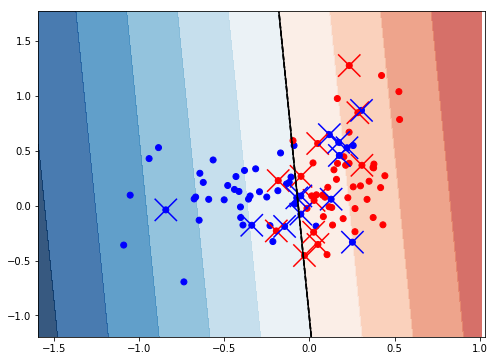

In [48]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1e12)
clf.fit(X, y)

plot_boundary(clf, X)

Linear kernel with low penalty ($C \rightarrow 0$)

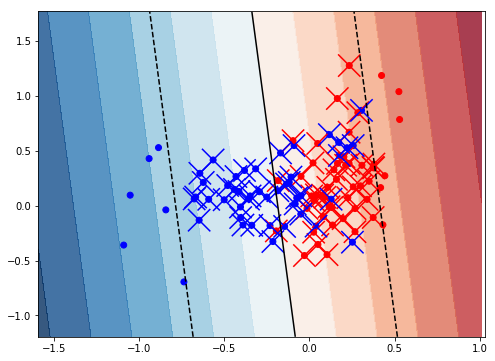

In [49]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1e-1)
clf.fit(X, y)

plot_boundary(clf, X)

RBF kernel with high penalty ($C \rightarrow \infty$) and small $\gamma$ (e.g., $\gamma = 0.1$):

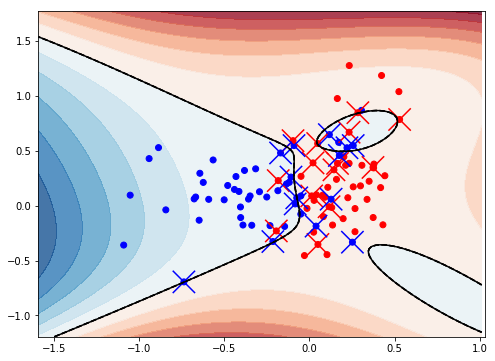

In [50]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', gamma=0.1, C=1e12)
clf.fit(X, y)
plot_boundary(clf, X)

RBF kernel with high penalty ($C \rightarrow \infty$) and high $\gamma$ (e.g., $\gamma = 20$)

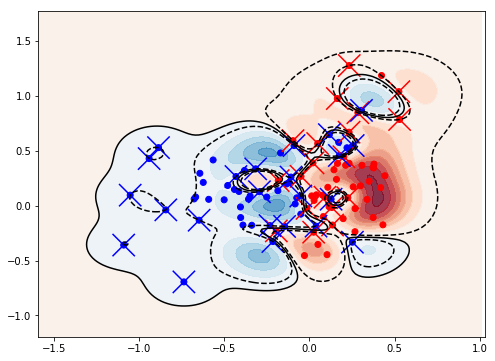

In [51]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', gamma=20, C=1e12)
clf.fit(X, y)
plot_boundary(clf, X)

---

# TASK 3. Classify digits with SVM

#### Load the Digits dataset

Load the features in a variable with name $\mathbf{X}$ and the target in a variable with name $\mathbf{y}$.

**Attention**: This dataset is composed of 1797 images of $8 \times 8$ pixels. You have to transform it in a matrix of 1797 samples and 64 features ($1797 \times 64$).

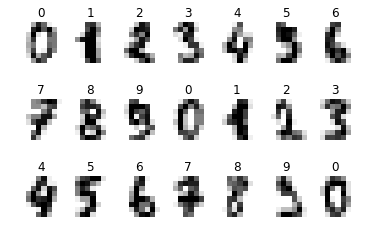

In [19]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

# plot the first 21 samples
for index, (image, label) in enumerate(zip(digits.images, digits.target)):
    if index < 21:
        plt.subplot(3, 7, index + 1)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('%i' % label)
    else:
        break 

In [20]:
X = digits.images.reshape(digits.images.shape[0], -1)
y = digits.target

#### Create a SVM Classifier

In this task, you have to classify the dataset in 10 different classes. You can an SVM classifier that is able to classify in 2 different classes to classify in n different classes. 

There are 2 main strategies for this:

- One-versus-one: http://scikit-learn.org/stable/modules/multiclass.html#one-vs-one
- One-versus-rest: http://scikit-learn.org/stable/modules/multiclass.html#one-vs-the-rest

The implementation of SVM classifier (SVC) in scikit-learn uses one-vs-one strategy:

http://scikit-learn.org/stable/modules/svm.html#multi-class-classification

Next, create a SVM classifier with **rbf** kernel and default parameters.
Then, create a list named **`gammas`** with values for the rbf coefficient (gamma) starting from $10^{-5}$ to $10^{-0.5}$, spaced evenly on a log scale. For each value of gamma, set the model parameter **`gamma`** to this value, calculate the 10-fold cross-validation scores, and add the average score to a list with name **`scores`**.

In [21]:
from sklearn import svm, model_selection

In [24]:
gammas = np.logspace(1e-5, 1e-1)
scores = []
clf = svm.SVC(kernel='rbf', decision_function_shape='ovo')
cv = KFold(n_splits=10, shuffle=True, random_state=0)

for gamma in gammas:
    clf.gamma = gamma
    avg = np.mean(cross_val_score(clf, X, y, cv=cv))
    scores.append(avg)

KeyboardInterrupt: 

Finally, plot the scores for each gamma, and print the best gamma and the associated score.

In [ ]:
print('Best gamma:', gammas[np.argmax(scores)])
print('Best score:', scores[np.argmax(scores)])

semilogx(gammas, scores)
plt.xlabel('gamma')
plt.ylabel('Score (accuracy)')

#### Subtask 3: 
Find both **gamma** and **C** that minimizes the error (or maximizes the score) using 10-fold cross-validation.

In [ ]:
from sklearn.grid_search import GridSearchCV

param_grid = {'C': np.logspace(1e-1, 1e1),
              'gamma': np.logspace(1e-1, 1e-1)}

grid = GridSearchCV(clf, param_grid, cv=7)

grid.fit(X, y)
grid.best_params_

NOTE: It takes long to execute.

-----
### TOPIC: Classifier Modeling 

In this task, you need to compare the decision boundaries of several different classifiers.

In [5]:
# define a colormap to plot the dataset points

from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

We will use three randomly generated datasets using three different generation functions:

- make_classification
- make_moons
- make_circles

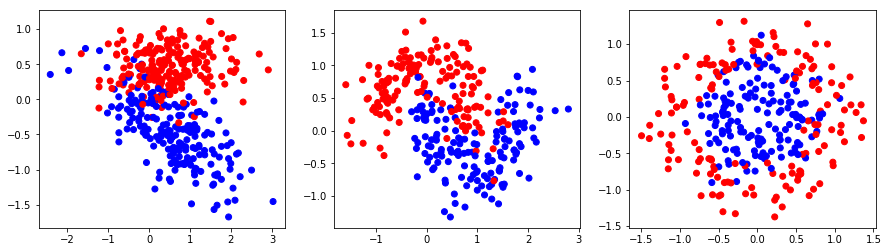

In [6]:
from sklearn.datasets import make_classification, make_moons, make_circles

linear = make_classification(n_samples=400, n_features=2, n_redundant=0, n_informative=2,
                           random_state=3, n_clusters_per_class=1, class_sep=0.5)

moons = make_moons(n_samples=300, noise=0.3, random_state=0)

circles = make_circles(n_samples=300, noise=0.2, factor=0.5, random_state=1)

figure(figsize=(15,4))
i = 0
for dataset in [linear, moons, circles]:
    X, y = dataset
    i += 1
    subplot(1,3,i)
    scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from collections import OrderedDict

models = OrderedDict([
          ('Logistic Regression', LogisticRegression()),
          ('Linear SVM', SVC(kernel='linear', probability=True)),
          ('Poly SVM', SVC(kernel='poly', degree=2, probability=True)),
          ('RBF SVM', SVC(kernel='rbf', gamma=2, C=1, probability=True)),
          ('Multilayer Perceptron', MLPClassifier((4,3,2), activation='tanh',solver='adam', max_iter=10000,
                                                  learning_rate_init=0.01, random_state=0))
          ])

The next example shows the decision boundaries of the SVM classifier with RBF kernel when classifying the linear dataset.   
We use the method `predict_proba` to get the probability that the classifier assigned to each class.

Text(3.20977,-1.87252,'.90')

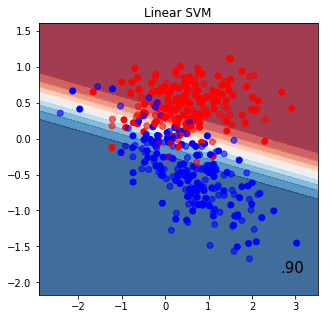

In [8]:
figure(figsize=(5, 5))

name = 'Linear SVM'
clf = models[name]
dataset = linear

plt.title(name)
X, y = dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

# create a mesh of points that cover the full graph area
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# use the classifier to predict the class of each mesh point
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] - 0.5
Z = Z.reshape(xx.shape)

# plot the decision boundary
norm = plt.cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
contourf(xx, yy, Z, 10, cmap=plt.cm.RdBu, alpha=.8, norm=norm)

# Plot also the training points
scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           alpha=0.6)

# plot also the score
text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

#### TASK:

Plot the decision boundaries of the different classifiers for each dataset. 

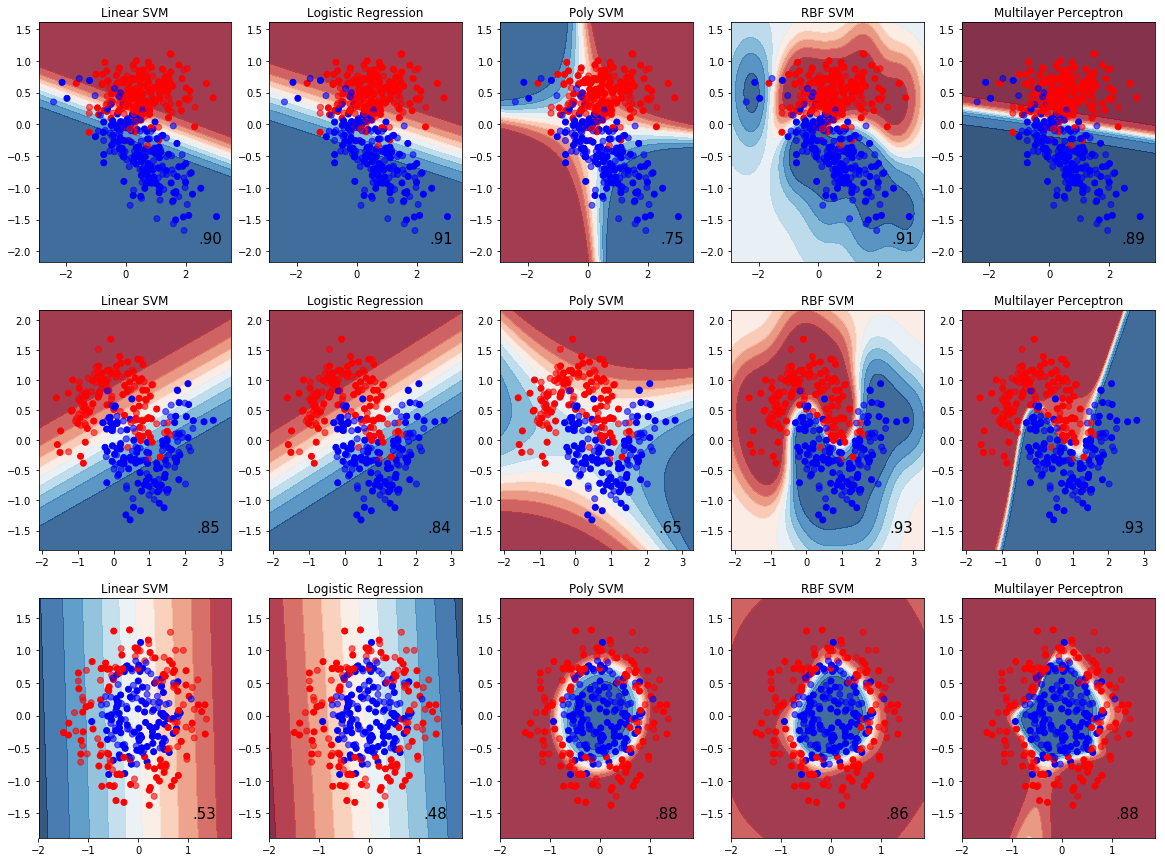

In [10]:
datasets = [linear, moons, circles]
figure(figsize=(20, 15))

i = 1
for dataset in datasets:

    names = ['Linear SVM', 'Logistic Regression', 'Poly SVM', 'RBF SVM', 'Multilayer Perceptron']

    for name in names:
        subplot(3,5,i)
        i += 1
        clf = models[name]

        plt.title(name)
        X, y = dataset

        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # create a mesh of points that cover the full graph area
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        h = .02  # step size in the mesh
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        X_grid = np.c_[xx.ravel(), yy.ravel()]

        # use the classifier to predict the class of each mesh point
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] - 0.5
        Z = Z.reshape(xx.shape)

        # plot the decision boundary
        norm = plt.cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
        contourf(xx, yy, Z, 10, cmap=plt.cm.RdBu, alpha=.8, norm=norm)

        # Plot also the training points
        scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        # plot also the score
        text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                        size=15, horizontalalignment='right')